# Ordinary Differential Equation

## Euler Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import typing as nptyping

In [2]:
from solver import *


def euler_method(
    f, y0, boundary: nptyping.ArrayLike, num: int, method="forward"
) -> tuple:
    if method not in ["forward", "backward", "trapezoid"]:
        raise Exception("Invalid method.")

    a = boundary[0]
    b = boundary[1]
    h = (b - a) / (num - 1)  # step size
    xrange = np.linspace(a, b, num)
    yrange = np.zeros(num)

    if method == "forward":
        for i in range(num):
            if i == 0:
                yrange[i] = y0
            else:
                yrange[i] = yrange[i - 1] + f([xrange[i - 1], yrange[i - 1]]) * h
        return xrange, yrange
    elif method == "backward":
        for i in range(num):
            if i == 0:
                yrange[i] = y0
            else:
                obj_func = lambda y: yrange[i - 1] + f([xrange[i], y]) * h - y
                yrange[i] = newton_raphson(obj_func, x0=0.1)
        return xrange, yrange
    else:
        for i in range(num):
            if i == 0:
                yrange[i] = y0
            else:
                obj_func = (
                    lambda y: yrange[i - 1]
                    + (f([xrange[i - 1], yrange[i - 1]]) + f([xrange[i], y])) * h / 2
                )
                yrange[i] = newton_raphson(obj_func, x0=0.1)
        return xrange, yrange

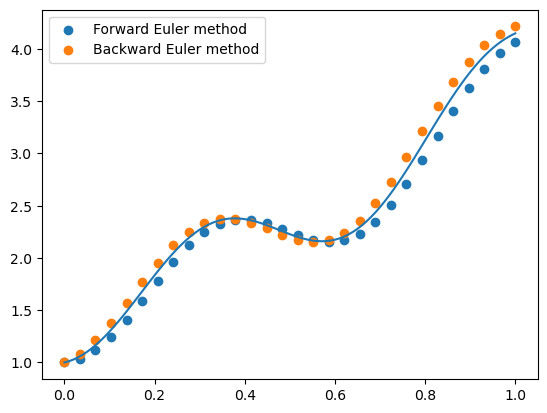

In [3]:
# Example of euler method
def my_func(var):
    x = var[0]
    y = var[1]
    return 4 * np.sin(10 * x) + y


def exact_sol(x):
    result = 4 * np.exp(x) * (
        -10 * np.exp(-x) * np.cos(10 * x) - np.exp(-x) * np.sin(10 * x)
    ) / 101 + 141 / 101 * np.exp(x)
    return result


root_fwd = euler_method(my_func, 1, [0, 1], 30)
root_bkwd = euler_method(my_func, 1, [0, 1], 30, method="backward")

xrange = np.linspace(0, 1, 101)
yrange = exact_sol(xrange)
plt.plot(xrange, yrange)
plt.scatter(root_fwd[0], root_fwd[1], label="Forward Euler method")
plt.scatter(root_bkwd[0], root_bkwd[1], label="Backward Euler method")
plt.legend()

## Predictor-Corrector Method

In [4]:
def predictor_corrector(f, y0, boundary: nptyping.ArrayLike, num: int) -> tuple:
    """
    Returns numerically calculated root of first order ode.
    Uses Euler predictor and trapezoidal corrector.
    """
    a = boundary[0]
    b = boundary[1]
    h = (b - a) / (num - 1)  # step size
    xrange = np.linspace(a, b, num)
    yrange = np.zeros(num)

    for i in range(num):
        if i == 0:
            yrange[i] = y0
        else:
            y_predict = yrange[i - 1] + f([xrange[i - 1], yrange[i - 1]]) * h
            # Correction step
            yrange[i] = (
                yrange[i - 1]
                + (f([xrange[i - 1], yrange[i - 1]]) + f([xrange[i], y_predict]))
                * h
                / 2
            )

    return xrange, yrange

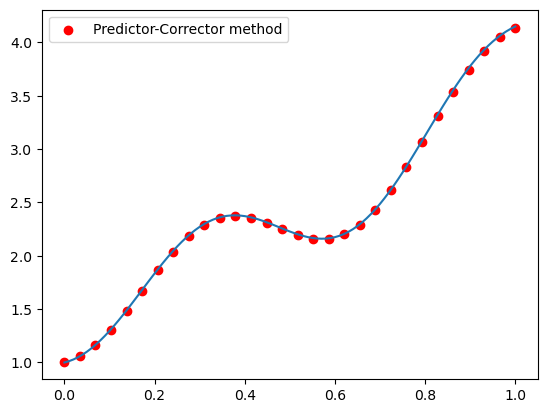

In [7]:
# Example of predictor-corrector method
def my_func(var):
    x = var[0]
    y = var[1]
    return 4 * np.sin(10 * x) + y


def exact_sol(x):
    result = 4 * np.exp(x) * (
        -10 * np.exp(-x) * np.cos(10 * x) - np.exp(-x) * np.sin(10 * x)
    ) / 101 + 141 / 101 * np.exp(x)
    return result


root = predictor_corrector(my_func, 1, [0, 1], 30)

xrange = np.linspace(0, 1, 101)
yrange = exact_sol(xrange)
plt.plot(xrange, yrange)
plt.scatter(root[0], root[1], color="r", label="Predictor-Corrector method")
plt.legend()